<a href="https://colab.research.google.com/github/EddyGiusepe/Pytorch_to_Speech_to_Text/blob/main/SpeakerID_with_Voxceleb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align="center">Speaker Verification with ECAPA-TDNN embeddings on Voxceleb</h2>


Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro

Neste Script fazemos uso do classificador treinado para realizar **previsões em novos Dados**. A SpeechBrain disponibilizou algumas classes como a ``EncoderClassifier`` que pode facilitar a inferência. A classe também pode ser usada para extrair alguns ``embeddings`` na saída do codificador.


**Vamos ver primeiro como podemos usá-lo** para carregar nosso melhor modelo xvector (treinado no ``Voxceleb`` e armazenado no ``HuggingFace``) para calcular alguns embeddings e realizar uma classificação de alto-falante:


## [Speaker Verification with xvector embeddings on Voxceleb - (<font color="orange">spkrec-xvect-voxceleb</font>)](https://huggingface.co/speechbrain/spkrec-xvect-voxceleb)

Este site fornece todas as ferramentas necessárias para ``extrair embeddings de alto-falante`` com um modelo ``TDNN`` pré-treinado usando ``SpeechBrain``. O sistema é treinado em dados de treinamento Voxceleb1 + Voxceleb2.

Para uma melhor experiência, encorajamos você a aprender mais sobre ``SpeechBrain``. O desempenho do [modelo fornecido](https://huggingface.co/speechbrain/spkrec-xvect-voxceleb) no conjunto de teste **Voxceleb1** (limpo) é:

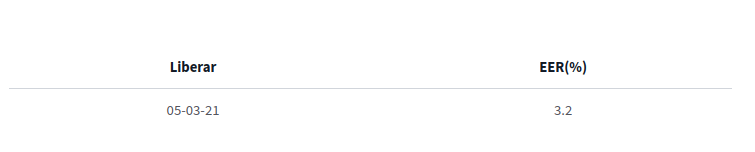

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture
# For pip installation
!pip install speechbrain

In [ ]:
import torchaudio
from speechbrain.pretrained import EncoderClassifier


classifier = EncoderClassifier.from_hparams(source="speechbrain/spkrec-xvect-voxceleb", savedir="/content/drive/MyDrive/2_DEEP_LEARNING_REDES_NEURAIS_Jorge/3_examples_of_Speech_Processing/Studying_SpeakerID_with_SpeechBrain/pretrained_model_spkID/spkrec-xvect-voxceleb")



/usr/local/lib/python3.7/dist-packages/huggingface_hub/utils/_deprecation.py:43: FutureWarning: Pass library_name=False as keyword args. From version 0.7 passing these as positional arguments will result in an error
  FutureWarning,


Downloading:   0%|          | 0.00/2.04k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/16.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.20k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/15.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/129k [00:00<?, ?B/s]

In [ ]:
# carregamos nosso áudio de teste

signal, fs =torchaudio.load('/content/drive/MyDrive/2_DEEP_LEARNING_REDES_NEURAIS_Jorge/2_SpeechBrain/speechbrain/samples/audio_samples/example1.wav')


In [ ]:
# Compute speaker embeddings

embeddings = classifier.encode_batch(signal)
embeddings.shape

torch.Size([1, 1, 512])

In [ ]:
# Perform classification (Executa a classificação)

output_probs, score, index, text_lab = classifier.classify_batch(signal)


In [ ]:
# Posterior log probabilities (Probabilidades de log posteriores)

print(output_probs)

tensor([[-31.8672, -35.2025, -25.7931,  ..., -21.0044, -12.4278, -21.5265]])


In [ ]:
# Score (i.e, max log posteriors)

print(score)

tensor([-1.1279])


In [ ]:
# Index of the predicted speaker (Índice do orador previsto)

print(index)

tensor([2710])


In [ ]:
# Text label of the predicted speaker (Rótulo de texto do orador previsto)

print(text_lab)

['id10892']


## [Speaker Verification with ECAPA-TDNN embeddings on Voxceleb - (<font color="orange">spkrec-ecapa-voxceleb</font>)](https://huggingface.co/speechbrain/spkrec-ecapa-voxceleb)

[Este repositório](https://huggingface.co/speechbrain/spkrec-ecapa-voxceleb) fornece todas as ferramentas necessárias para realizar a ``verificação de alto-falante`` com um modelo ``ECAPA-TDNN`` pré-treinado usando **SpeechBrain**. O sistema também pode ser usado para ``extrair embeddings de alto-falantes``. Ele é treinado em dados de treinamento Voxceleb 1+ Voxceleb2.

Para uma melhor experiência, encorajamos você a aprender mais sobre SpeechBrain . O desempenho do modelo no conjunto de teste Voxceleb1 (limpo) é:

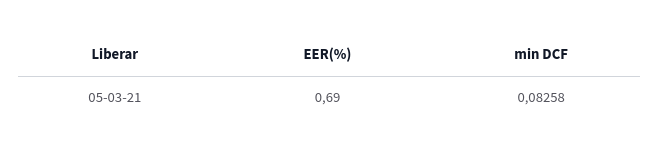

Este sistema é composto por um modelo ``ECAPA-TDNN``. É uma combinação de blocos convolucionais e residuais. Os ``embeddings`` são extraídas usando um pooling estatístico atencioso. O sistema é treinado com ``Additive Margin Softmax Loss``. A **verificação do alto-falante** é realizada usando a distância cosseno entre os speakers embeddings.


<font color="yellow">A seguir calculamos o embedding de um alto-falante</font> (``Compute your speaker embeddings``)

In [ ]:
import torchaudio
from speechbrain.pretrained import EncoderClassifier


classifier_emb = EncoderClassifier.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb", savedir="/content/drive/MyDrive/2_DEEP_LEARNING_REDES_NEURAIS_Jorge/3_examples_of_Speech_Processing/Studying_SpeakerID_with_SpeechBrain/pretrained_model_emb/spkrec-ecapa-voxceleb")

/usr/local/lib/python3.7/dist-packages/huggingface_hub/utils/_deprecation.py:43: FutureWarning: Pass library_name=False as keyword args. From version 0.7 passing these as positional arguments will result in an error
  FutureWarning,


Downloading:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/83.3M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.53M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/129k [00:00<?, ?B/s]

In [ ]:
# De forma similar acima, carregamos nosso áudio teste

signal, fs =torchaudio.load('/content/drive/MyDrive/2_DEEP_LEARNING_REDES_NEURAIS_Jorge/2_SpeechBrain/speechbrain/samples/audio_samples/example1.wav')


In [ ]:
# Compute speaker embeddings with the model "spkrec-ecapa-voxceleb"

embeddings_emb = classifier_emb.encode_batch(signal)
embeddings_emb.shape

torch.Size([1, 1, 192])

<font color="orange">Agora procedemos a realizar a Verificação de alto-falante (locutor)</font> (``Perform Speaker Verification``)

Então, aqui vamos a usar a interface de Inferência chamada [SpeakerRecognition](https://huggingface.co/speechbrain/spkrec-ecapa-voxceleb).

In [ ]:
import time
from time import perf_counter
from speechbrain.pretrained import SpeakerRecognition

verification = SpeakerRecognition.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb", savedir="/content/drive/MyDrive/2_DEEP_LEARNING_REDES_NEURAIS_Jorge/3_examples_of_Speech_Processing/Studying_SpeakerID_with_SpeechBrain/pretrained_model_SpeakerRecognition/spkrec-ecapa-voxceleb")

/usr/local/lib/python3.7/dist-packages/huggingface_hub/utils/_deprecation.py:43: FutureWarning: Pass library_name=False as keyword args. From version 0.7 passing these as positional arguments will result in an error
  FutureWarning,


In [ ]:
# score, prediction = verification.verify_files("speechbrain/spkrec-ecapa-voxceleb/example1.wav", "speechbrain/spkrec-ecapa-voxceleb/example2.flac")

# Instanciamos nossos áudios a comparar:
file1 = '/content/drive/MyDrive/2_DEEP_LEARNING_REDES_NEURAIS_Jorge/2_SpeechBrain/speechbrain/samples/audio_samples/example1.wav'
file2 = '/content/drive/MyDrive/2_DEEP_LEARNING_REDES_NEURAIS_Jorge/2_SpeechBrain/speechbrain/samples/audio_samples/example5.wav'



t0 = perf_counter()
# Fazemos predição:
score, prediction = verification.verify_files(file1, file2)
tf = perf_counter()
time_interval = tf - t0
print("O tempo de inferência é: ", time_interval)


# Printamos os valores anteriores
print(score)
print(prediction) # True = same speaker, False=Different speakers


O tempo de inferência é:  1.4873928870001691
tensor([0.0085])
tensor([False])


Observação:

Os seguintes links são para complementar este estudo e para poder entender os arquivos de configuração (``por exemplo:`` [hyperparams.yaml](https://huggingface.co/speechbrain/spkrec-ecapa-voxceleb/blob/main/hyperparams.yaml#L48))


* [spkrec-ecapa-voxceleb/hyperparams.yaml](https://huggingface.co/speechbrain/spkrec-ecapa-voxceleb/blob/main/hyperparams.yaml#L48)


* [Hugging Face -- speechbrain/spkrec-ecapa-voxceleb](https://huggingface.co/speechbrain/spkrec-ecapa-voxceleb)



* [Hugging Face -- speechbrain/spkrec-xvect-voxceleb](https://huggingface.co/speechbrain/spkrec-xvect-voxceleb)

